In [1]:
!pip install altair


In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [3]:
!pip install seaborn

In [4]:
!pip install plotly_express

In [5]:
import altair as alt
import pandas as pd
import numpy as np
import streamlit as st



In [6]:
import streamlit as st

st.write("Hello World")
!streamlit run Copy_of_FinalV1.py

2024-06-16 15:12:15.513 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: Copy_of_FinalV1.py


In [7]:
# Dataset is downloaded from Kaggle site and kept at data directory.
# Link of Dataset :https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023
#Link to the modified Dataset in my Github: https://github.com/Solomon1533/Test1/blob/main/Test1.csv


In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/Solomon1533/Test1/main/Test1.csv")
data.head(5)

,Rank,YouTuber,Subscriber,Views,Country,Country_Abb,Catagories,Population,Unemployment_ Rate
0,3,MrBeast,166000000,2.836884e+10,United States,US,Entertainment,328239523,14.70
1,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,United States,US,Education,328239523,14.70
2,7,ýýý Kids Diana Show,112000000,9.324704e+10,United States,US,Entertainment,328239523,14.70
3,8,PewDiePie,111000000,2.905804e+10,Japan,JP,Entertainment,126226568,2.29
4,10,Vlad and Niki,98900000,7.718017e+10,United States,US,Entertainment,328239523,14.70


In [9]:
data.tail(5)

,Rank,YouTuber,Subscriber,Views,Country,Country_Abb,Catagories,Population,Unemployment_ Rate
420,988,Avril Lavigne,12400000,6.202090e+09,United States,US,Music,328239523,14.70
421,989,Caylus,12400000,4.779140e+09,United States,US,Games,328239523,14.70
422,990,Migos ATL,12400000,6.993406e+09,United States,US,Entertainment,328239523,14.70
423,993,Panda,12300000,2.214684e+09,United Kingdom,GB,Games,66834405,3.85
424,994,RobTopGames,12300000,3.741235e+08,Sweden,SE,Games,10285453,6.48


In [10]:
data.shape

(425, 9)

Droping the duplicate rows  
This is often a handy thing to do because a huge data set as in often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set if there are any.

In [11]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [12]:
chart_data = data.groupby('Country')['Subscriber'].mean()
chart_data

Country
Australia         1.911111e+07
Canada            2.426000e+07
Finland           1.320000e+07
France            1.678000e+07
Germany           1.940000e+07
Italy             1.970000e+07
Japan             3.782000e+07
Netherlands       1.936667e+07
Spain             1.750455e+07
Sweden            1.575000e+07
United Kingdom    2.133488e+07
United States     2.277839e+07
Name: Subscriber, dtype: float64

Checking the types of data  
Here we check for the datatypes because sometimes int or float would be stored as a string.

In [13]:
data.dtypes

Rank                    int64
YouTuber               object
Subscriber              int64
Views                 float64
Country                object
Country_Abb            object
Catagories             object
Population              int64
Unemployment_ Rate    float64
dtype: object

Wikipedia Definition,

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.  

Herein all the plots, we can find some points are outside the box they are none other than outliers.

<Axes: xlabel='Views'>

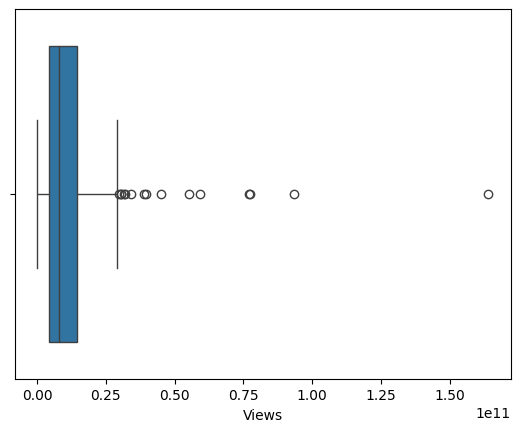

In [14]:
import seaborn as sns
sns.boxplot(x=data['Views'])

<Axes: xlabel='Subscriber'>

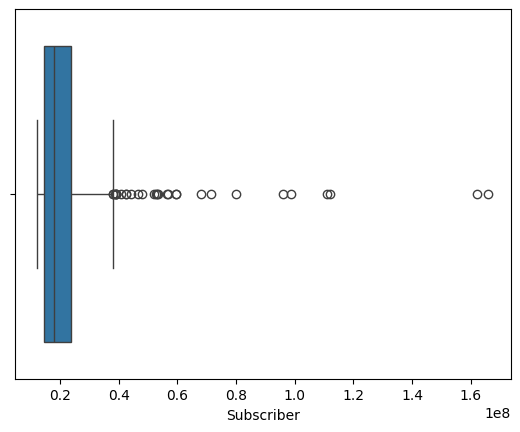

In [15]:
import seaborn as sns
sns.boxplot(x=data['Subscriber'])

In [38]:
data['Country'].max()


'United States'

In [39]:
data['Country'].min()

'Australia'

Scatterplot
The following two scatter plot shows different perspectives. We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Country and Unemployment rate and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

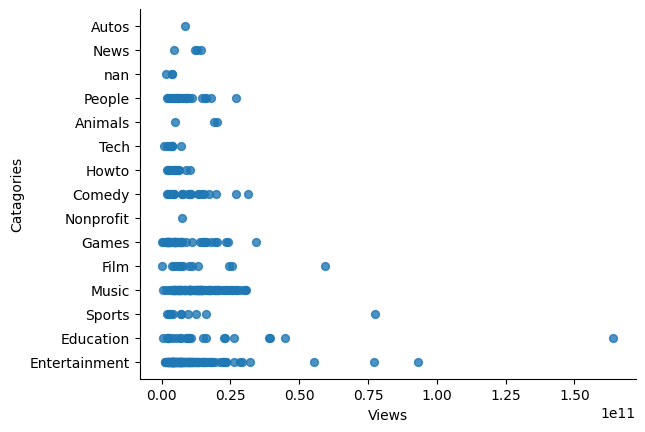

In [18]:
# @title Views vs Population

from matplotlib import pyplot as plt
# Convert 'Catagories' to string type if it contains numerical values
data['Catagories'] = data['Catagories'].astype(str)

data.plot(kind='scatter', x='Views', y='Catagories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

It's difficult to determine correlation just by visually inspecting a scatter plot, especially with categorical data like country on one axis.
To assess correlation, we would typically need:

Numerical Data: Both variables should be numerical to calculate a meaningful correlation coefficient. In this plot country are categorical, not numerical. This graph just shows the unemployment distribution by developped contries. It doesn't have any stsstical significance.


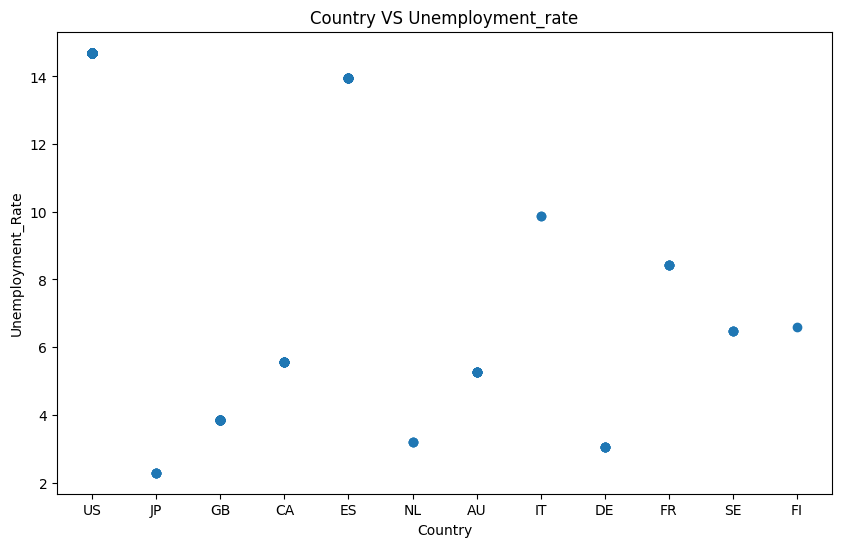

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Country_Abb'], data['Unemployment_ Rate'])
ax.set_xlabel('Country')
ax.set_ylabel('Unemployment_Rate')
ax.set_title('Country VS Unemployment_rate')
plt.show()

The pie chart, as it stands, is showing the proportion of total subscribers that belong to each category. Each slice of the pie represents a category, and the size of the slice corresponds to the number of subscribers in that category relative to the total number of subscribers across all categories.

In [44]:
#Distribution of catagories by Pie Chart

import plotly.express as px
data['Subscriber'] = data['Subscriber'].astype(int)
#data['Catagories'] = data['Catagories'].astype('category').cat.codes
fig3 = px.pie(data, values='Subscriber', names='Catagories', color_discrete_sequence=px.colors.qualitative.Pastel)
fig3.show()

This is to show there is no null values in the dataset.

In [21]:
for col in data.columns:
    null_counter = data[col].isnull().sum()
    null_percent = null_counter/len(data) * 100
    print(f'There are {null_counter} ({null_percent:.2f}%) null values in {col}')

There are 0 (0.00%) null values in Rank
There are 0 (0.00%) null values in YouTuber
There are 0 (0.00%) null values in Subscriber
There are 0 (0.00%) null values in Views
There are 0 (0.00%) null values in Country
There are 0 (0.00%) null values in Country_Abb
There are 0 (0.00%) null values in Catagories
There are 0 (0.00%) null values in Population
There are 0 (0.00%) null values in Unemployment_ Rate


The boxes in the boxplot I've created are trying to show the distribution of the 'Subscriber' values within each 'Category'. Here's how to interpret them:

The Line in the Middle of the Box: This represents the median value of 'Subscriber' for that particular 'Category'. Half of the subscribers in that category have a value above this line, and half have a value below it.
The Edges of the Box (the "Box" itself): These lines, often called the first quartile (Q1) and third quartile (Q3), represent the 25th and 75th percentiles of the data, respectively. The box encompasses the middle 50% of the data.
The "Whiskers" (Lines Extending from the Box): These lines typically extend to 1.5 times the interquartile range (IQR) from the edges of the box (IQR = Q3 - Q1). Data points beyond the whiskers are often considered outliers.
Individual Points (Dots): These represent outlier values that fall outside the whiskers.

In [22]:
data_Catagories = data.dropna(subset = ['Catagories'])
data_Country = data.dropna(subset = ['Country'])
Catagories_medians = data_Catagories.groupby('Catagories')['Subscriber'].median()
median_order = Catagories_medians.sort_values(ascending = False).index

<ipython-input-53-8071db60328e>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




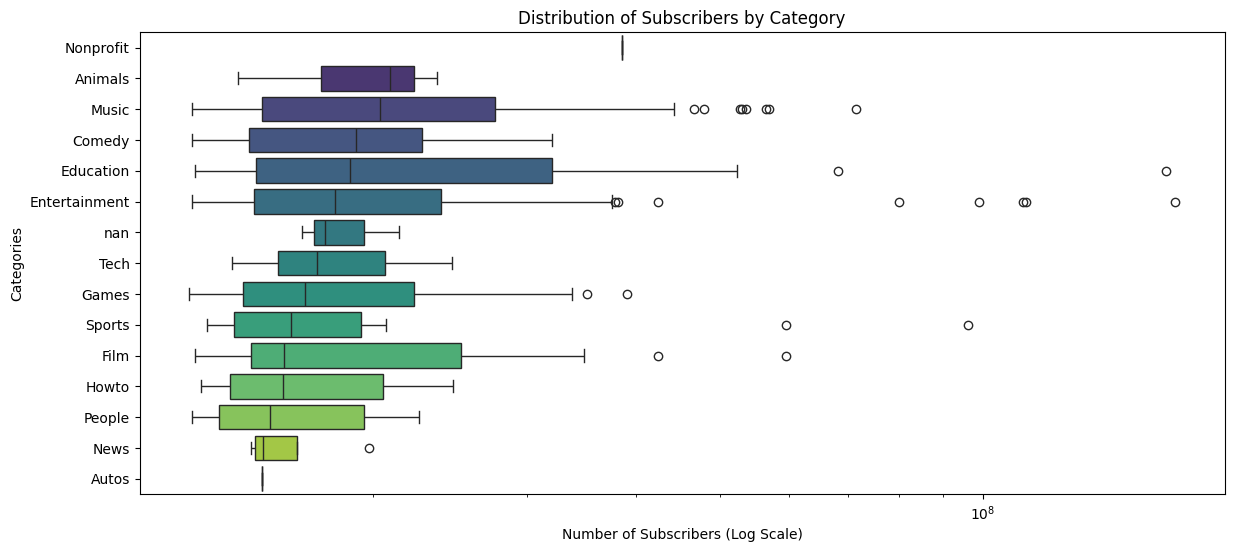

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_Catagories' is your DataFrame
# and 'Average Rating' is a column **that exists in the DataFrame**
fig, ax = plt.subplots(figsize=(14, 6))
g = sns.boxplot(data=data_Catagories,
                x='Subscriber',
                y='Catagories',
                order=median_order,
                palette="viridis",  # Add color coding
                # hue='Average Rating'  # Remove or replace with an existing column name for color coding
                )
ax.set_title('Distribution of Subscribers by Category')
ax.set_xlabel('Number of Subscribers (Log Scale)')
ax.set_ylabel('Categories')
ax.set_xscale('log')  # Use logarithmic scale for x-axis
plt.show()

By looking at this plot, ordered by median, we can see that for most categories, the center of distribution is really similar. "Trailers" stands out for having a median that is higher than the others.

We can also see that the Interquartile Range and the number of outliers varies more in some of these categories.

Something that might have something to do with these variations is the size of the sample in this specific dataset (which already contains well performing channels). Outliers represent channels within a category that have a significantly higher or lower subscriber count compared to the majority of channels in that same category.

<ipython-input-59-cc4d4617e6d2>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




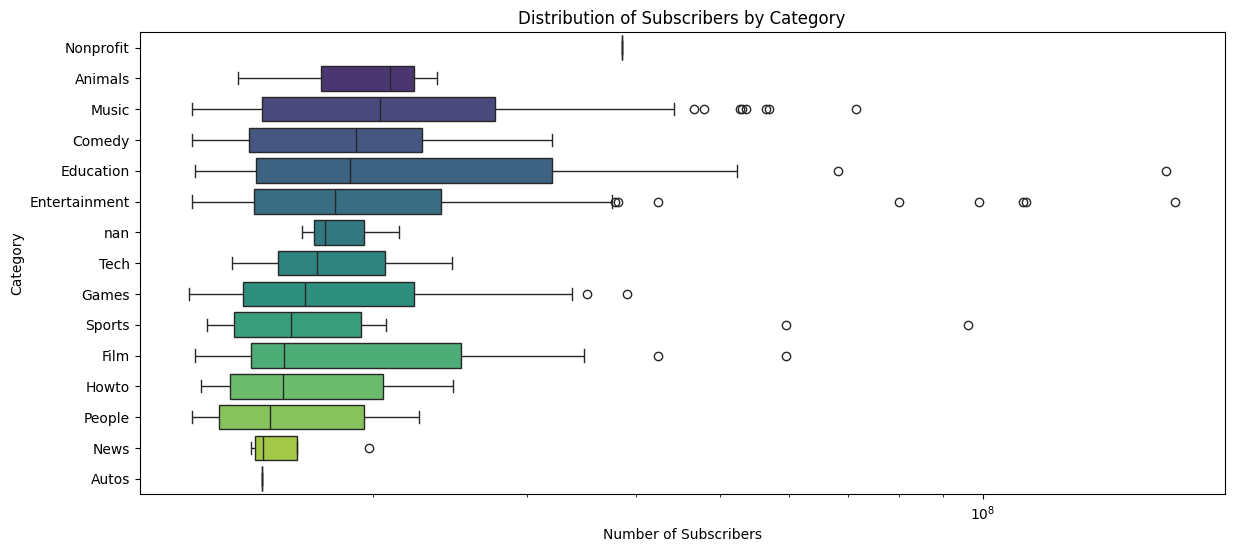

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 6))

# Use boxplot to show distribution of subscriber counts within each category
sns.boxplot(
    data=data_Catagories,
    x='Subscriber',  # Number of subscribers on x-axis
    y='Catagories',
    order=median_order,  # Order categories by median subscriber count
    palette="viridis"
)

ax.set_title('Distribution of Subscribers by Category')
ax.set_xlabel('Number of Subscribers')
ax.set_ylabel('Category')
ax.set_xscale('log')  # Consider log scale if subscriber counts vary widely
plt.show()

The choropleth map I've created aims to show the average number of subscribers by country. It uses color intensity to represent the magnitude of the average subscriber count in each country.

In [62]:
data_geo_Subscriber = data_Country.groupby('Country')['Subscriber'].mean().reset_index()
data_geo_Subscriber = data_geo_Subscriber.rename(columns = {'Subscriber': "Subscriber (millions)"})
px.choropleth(data_geo_Subscriber,
                    locations="Country",
                    locationmode='country names',
                    color='Subscriber (millions)',
                    color_continuous_scale=px.colors.sequential.YlGn ,
                    title="Average number of Subscribers by Country"
             )

In [67]:
import altair as alt
alt.Chart(data).mark_bar().encode(
    x='Country',
    y='Subscriber'
)




alt.Chart(...)

However, the following plot shows description of it showing "population, views by country" This plot is simply showing population and views by country without any normalization or additional context. it might not be very informative. Here's why:

Population Bias: Countries with larger populations will naturally have more views, even if their viewership per capita is lower.
Lack of Comparison: Without a way to compare viewership relative to population or other factors, it's hard to draw meaningful conclusions.

The interactive plot following the below one has a better representation.

In [69]:
import altair as alt

alt.Chart(data).mark_point().encode(
    x="Population",
    y="Views",
    color=alt.Color("Country", scale=alt.Scale(scheme="spectral")),
    tooltip=["Country", "Population"]
).properties(
  width=500,
  height=200
)

alt.Chart(...)

In [71]:
import plotly.express as px

# Assuming 'df' is your DataFrame with 'Country', 'Population', and 'Views' columns
data['ViewsPerCapita'] = data['Views'] / data['Population']

fig = px.choropleth(data,
                    locations="Country",
                    locationmode='country names',
                    color="ViewsPerCapita",
                    color_continuous_scale="Viridis",
                    title="Views Per Capita by Country",
                    hover_name="Country",
                    hover_data=['Views', 'Population']
                   )
fig.show()

In [73]:
#Test your knowledge. How do we facet charts
c1 = alt.Chart(data).mark_circle().encode(
    x = "Catagories",
    y = "Country",
)

c2 = alt.Chart(data).mark_circle().encode(
    x = "Catagories",
    y = "Views",
)

c1|c2

alt.HConcatChart(...)

The scatter plot showing the relationship between Subscribers and Views.

It looks like there is a general positive correlation between the number of subscribers a YouTuber has and the number of views their videos receive. This makes intuitive sense - the more subscribers, the larger the potential audience for each video.
Outliers: There are a few outliers, particularly in the higher subscriber range, where some YouTubers have significantly more views than others with a similar subscriber count. This suggests that factors beyond just subscriber count influence views (e.g., video quality, content type, promotion, etc.).

  





Overall Interpretation:

By looking at the position of the points in the scatter plot, we can get a sense of the relationship between average population size and average number of subscribers across different groups.



In [88]:
import plotly.express as px

# Creating a scatter plot using plotly express (px)
plot = px.scatter(
    x=data["Subscriber"],
    y=data["Views"],
    color=data["Catagories"],
    size=[10] * len(data),  # Setting a fixed size for all dots
    hover_name=data["YouTuber"],
    color_discrete_sequence=["red", "blue", "green", "orange", "green",
                             "yellow", "purple", "black"]
)

# Updating the layout of the plot
plot.update_layout(
    xaxis=dict(title="Subscriber"),
    yaxis=dict(title="Views"),
    title="Relationship between Views and Subscribers",
    title_x=0.48
)

# Displaying the plot
plot.show()

For the youtube data, I split by origin, compute the mean of the subscribers, and then combine the results. In Pandas, the operation looks in the below graph:

Here I use the mean formula to calculate each countries mean value.   
$Mean(X)=\sum_{i=1}^n \frac{X}{n}$

In [32]:
print(data['Catagories'].dtype)  # Check data type
print(data['Catagories'].unique()) # Print unique categories

object
['Entertainment' 'Education' 'Sports' 'Music' 'Film' 'Games' 'Nonprofit'
 'Comedy' 'Howto' 'Tech' 'Animals' 'People' 'nan' 'News' 'Autos']


In [33]:
data['Catagories'] = data['Catagories'].astype('category')

In [34]:
data.groupby('Country')['Subscriber'].mean()

Country
Australia         1.911111e+07
Canada            2.426000e+07
Finland           1.320000e+07
France            1.678000e+07
Germany           1.940000e+07
Italy             1.970000e+07
Japan             3.782000e+07
Netherlands       1.936667e+07
Spain             1.750455e+07
Sweden            1.575000e+07
United Kingdom    2.133488e+07
United States     2.277839e+07
Name: Subscriber, dtype: float64

The below graph is an exact reflection of the above Mean data calculation.

In [35]:
alt.Chart(data).mark_bar().encode(
    y='Country',
    x='mean(Subscriber)'
)


alt.Chart(...)

Customizing the interval selection  
The alt.selection_interval() function takes a number of additional arguments; for example, by specifying encodings, we can control whether the selection covers x, y, or both:

In [36]:
import altair as alt
# Assuming 'data' is a pandas DataFrame available in the environment
interval = alt.selection_interval(encodings=['x'])

alt.Chart(data).mark_point().encode(
    x='Catagories',  # Corrected typo: 'Categories' instead of 'Catagories'
    y='Subscriber',
    color=alt.condition(interval, 'Country', alt.value('lightgray'), type='nominal')  # Explicitly set 'Country' type
).add_selection(
    interval
)

alt.Chart(...)

The correlation matrix shows how strongly different numerical variables in the dataset are related to each other. Each cell in the matrix represents the correlation coefficient between a pair of variables.   
So, when you see a correlation of 0.1 between "Population" and "Views", it means there's a weak positive relationship between those two things. In simpler terms:

Positive Relationship: As the population increases, the number of views tends to increase as well, but not very reliably.
Weak: The relationship isn't very strong. There are likely many other factors influencing the number of views besides just the size of the population.  

Here's a way to think about correlation values in general:

1.0: Perfect positive correlation. When one variable goes up, the other goes up by a directly proportional amount.  

0.5: Moderate positive correlation. There's a tendency for the variables to move together in the same direction, but it's not a super tight relationship.  

0.0: No correlation. There's no relationship between the variables. Changes in one don't tell you anything about changes in the other.  

-0.5: Moderate negative correlation. There's a tendency for the variables to move in opposite directions.  

-1.0: Perfect negative correlation. When one variable goes up, the other goes down by a directly proportional amount.





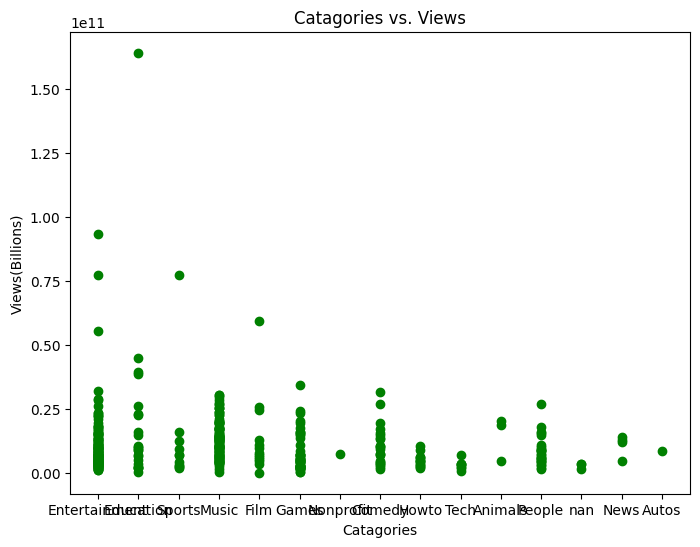

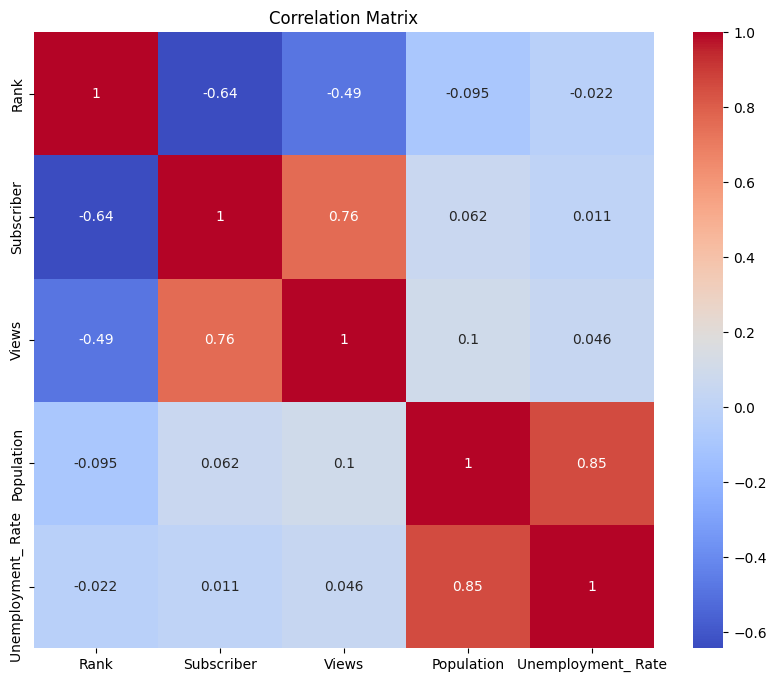

In [37]:
# Scatter plot of Catagories vs. Views
plt.figure(figsize=(8, 6))
# Convert 'Categories' column to strings explicitly
plt.scatter(data['Catagories'].astype(str), data['Views'], color='green')
plt.title('Catagories vs. Views')
plt.xlabel('Catagories')
plt.ylabel('Views(Billions)')
plt.show()

# Calculate the correlation matrix, EXCLUDING non-numerical columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()